In [94]:
import os
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def concat_csv_files(root_directory):
    # Dictionary to hold DataFrames keyed by filename
    dataframes = {}

    # Get all subdirectories in the root directory
    subdirectories = [os.path.join(root_directory, d) for d in os.listdir(root_directory) if os.path.isdir(os.path.join(root_directory, d))]

    # Initialize a dictionary to store file paths by file name
    file_paths = {}

    # Loop over each directory and collect files
    for subdir in subdirectories:
        for file in os.listdir(subdir):
            if file.endswith('.csv'):  # Only process CSV files
                # Prepare the full path of the file
                full_path = os.path.join(subdir, file)
                # Append the path to the list for this file name
                if file not in file_paths:
                    file_paths[file] = []
                file_paths[file].append(full_path)

    print(file_paths)
    # Read and concatenate all files with the same name across directories
    for filename, paths in file_paths.items():
        # Read each file and store in a list
        dfs = [pd.read_csv(path) for path in paths]
        # Concatenate all DataFrames in the list
        concatenated_df = pd.concat(dfs)
        # Add a column to indicate the source file directory for each row
        concatenated_df['source_directory'] = [os.path.basename(os.path.dirname(path)) for path in paths for _ in range(len(pd.read_csv(path)))]
        # Store the concatenated DataFrame in the dictionary using the filename as the key
        dataframes[filename] = concatenated_df

    return dataframes

# Example usage
root_directory = 'eval_results'
result_dfs = concat_csv_files(root_directory)

rename_map = {
    'babbage-002_epoch3_result_detailedInstr': "Babbage-002, Epoch 3, DetailedInstr",
    'babbage-002_epoch3_result': "Babbage-002, Epoch 3, Standard",
    'babbage-002_epoch4_result_detailedInstr': "Babbage-002, Epoch 4, DetailedInstr",
    'babbage-002_epoch4_result': "Babbage-002, Epoch 4, Standard",
    'davinci_epoch3_result_detailedInstr': "Davinci, Epoch 3, DetailedInstr",
    'results_3point5_ft_detailedInstr': "GPT-3.5, Fine-Tuned, DetailedInstr",
    'results_3point5_og_detailedInstr': "GPT-3.5, Original, DetailedInstr"
}

metrics_df = result_dfs['metrics.csv']
metrics_df.columns = ['Metrics', 'Number of Bedrooms', 'Type of Property',
       'Is any space shared?', 'Overall vibes/atmosphere', 'source_directory']

# Replace model identifiers in 'source_directory' with formatted names from rename_map
metrics_df['source_directory'] = metrics_df['source_directory'].map(rename_map)

{'format_accuracy.csv': ['eval_results/results_3point5_ft_detailedInstr/format_accuracy.csv', 'eval_results/babbage-002_epoch3_result_detailedInstr/format_accuracy.csv', 'eval_results/babbage-002_epoch3_result/format_accuracy.csv', 'eval_results/babbage-002_epoch4_result_detailedInstr/format_accuracy.csv', 'eval_results/babbage-002_epoch4_result/format_accuracy.csv', 'eval_results/davinci_epoch3_result_detailedInstr/format_accuracy.csv', 'eval_results/results_3point5_og_detailedInstr/format_accuracy.csv'], 'confusion_matrix_overall_vibes_atmosphere.csv': ['eval_results/results_3point5_ft_detailedInstr/confusion_matrix_overall_vibes_atmosphere.csv', 'eval_results/babbage-002_epoch3_result_detailedInstr/confusion_matrix_overall_vibes_atmosphere.csv', 'eval_results/babbage-002_epoch3_result/confusion_matrix_overall_vibes_atmosphere.csv', 'eval_results/babbage-002_epoch4_result_detailedInstr/confusion_matrix_overall_vibes_atmosphere.csv', 'eval_results/babbage-002_epoch4_result/confusion_m

In [95]:
result_dfs.keys()

dict_keys(['format_accuracy.csv', 'confusion_matrix_overall_vibes_atmosphere.csv', 'eval_df.csv', 'confusion_matrix_is_any_space_shared?.csv', 'metrics_detailed.csv', 'metrics.csv', 'metrics_overall_vibes_atmosphere.csv', 'confusion_matrix_number_of_bedrooms.csv', 'confusion_matrix_type_of_property.csv', 'detailed_metrics_concatenated.csv'])

In [96]:
format_accuracy_df = result_dfs['format_accuracy.csv']
format_accuracy_df

,json_status,proportion,source_directory
0,Perfect,1.000000,results_3point5_ft_detailedInstr
0,Fixable,0.900000,babbage-002_epoch3_result_detailedInstr
1,Perfect,0.100000,babbage-002_epoch3_result_detailedInstr
0,Fixable,0.733333,babbage-002_epoch3_result
1,Perfect,0.266667,babbage-002_epoch3_result
0,Fixable,1.000000,babbage-002_epoch4_result_detailedInstr
0,Fixable,1.000000,babbage-002_epoch4_result
0,Fixable,1.000000,davinci_epoch3_result_detailedInstr
0,Perfect,1.000000,results_3point5_og_detailedInstr


In [97]:
# Pivot the DataFrame to make models as columns
pivot_df = format_accuracy_df.pivot_table(index='json_status', columns='source_directory', values='proportion', aggfunc='first')

# Fill missing values with zero or a suitable default
pivot_df = pivot_df.fillna(0)

# Convert to Markdown Table
markdown_table = tabulate(pivot_df, tablefmt="pipe", headers="keys")

print(markdown_table)

| json_status   |   babbage-002_epoch3_result |   babbage-002_epoch3_result_detailedInstr |   babbage-002_epoch4_result |   babbage-002_epoch4_result_detailedInstr |   davinci_epoch3_result_detailedInstr |   results_3point5_ft_detailedInstr |   results_3point5_og_detailedInstr |
|:--------------|----------------------------:|------------------------------------------:|----------------------------:|------------------------------------------:|--------------------------------------:|-----------------------------------:|-----------------------------------:|
| Fixable       |                    0.733333 |                                       0.9 |                           1 |                                         1 |                                     1 |                                  0 |                                  0 |
| Perfect       |                    0.266667 |                                       0.1 |                           0 |                                       

In [98]:
result_dfs['metrics.csv']
# .to_clipboard(index=False)

,Metrics,Number of Bedrooms,Type of Property,Is any space shared?,Overall vibes/atmosphere,source_directory
0,accuracy,0.850000,0.691667,0.816667,0.575000,"GPT-3.5, Fine-Tuned, DetailedInstr"
1,precision,0.696212,0.461607,0.846032,0.366209,"GPT-3.5, Fine-Tuned, DetailedInstr"
2,recall,0.607879,0.462246,0.614473,0.383279,"GPT-3.5, Fine-Tuned, DetailedInstr"
3,f1_score,0.608507,0.457990,0.603327,0.369699,"GPT-3.5, Fine-Tuned, DetailedInstr"
0,accuracy,0.808333,0.691667,0.783333,0.508333,"Babbage-002, Epoch 3, DetailedInstr"
1,precision,0.684159,0.371684,0.489418,0.262636,"Babbage-002, Epoch 3, DetailedInstr"
2,recall,0.695942,0.370590,0.560762,0.262936,"Babbage-002, Epoch 3, DetailedInstr"
3,f1_score,0.670226,0.362056,0.520229,0.259437,"Babbage-002, Epoch 3, DetailedInstr"
0,accuracy,0.816667,0.658333,0.791667,0.500000,"Babbage-002, Epoch 3, Standard"
1,precision,0.696172,0.337767,0.504610,0.253120,"Babbage-002, Epoch 3, Standard"


In [84]:


# Plotting function with ordered models and color change
def plot_grouped_metrics(data):
    # Melt the DataFrame to facilitate grouped bar plotting
    data = data.melt(id_vars=['Metrics', 'source_directory'], var_name='Attribute', value_name='Score')

    metrics = data['Metrics'].unique()
    model_order = list(rename_map.values())  # Model order from rename_map
    color_palette = sns.color_palette("RdBu_r", n_colors=len(model_order))  # Change color scheme

    for metric in metrics:
        plt.figure(figsize=(12, 8))
        sns.barplot(x='Attribute', y='Score', hue='source_directory', data=data[data['Metrics'] == metric],
                    hue_order=model_order, palette=color_palette)
        plt.title(f'{metric.capitalize()} for All Attributes Across All Models')
        plt.ylabel('Score')
        plt.xlabel('Attribute')
        plt.xticks(rotation=45)
        plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        
        # Save the figure
        plt.savefig(f"eval_results/aggregate_results/{metric}_metrics_chart.png", dpi=300)  # Save the figure as a PNG file with high resolution
        plt.show()

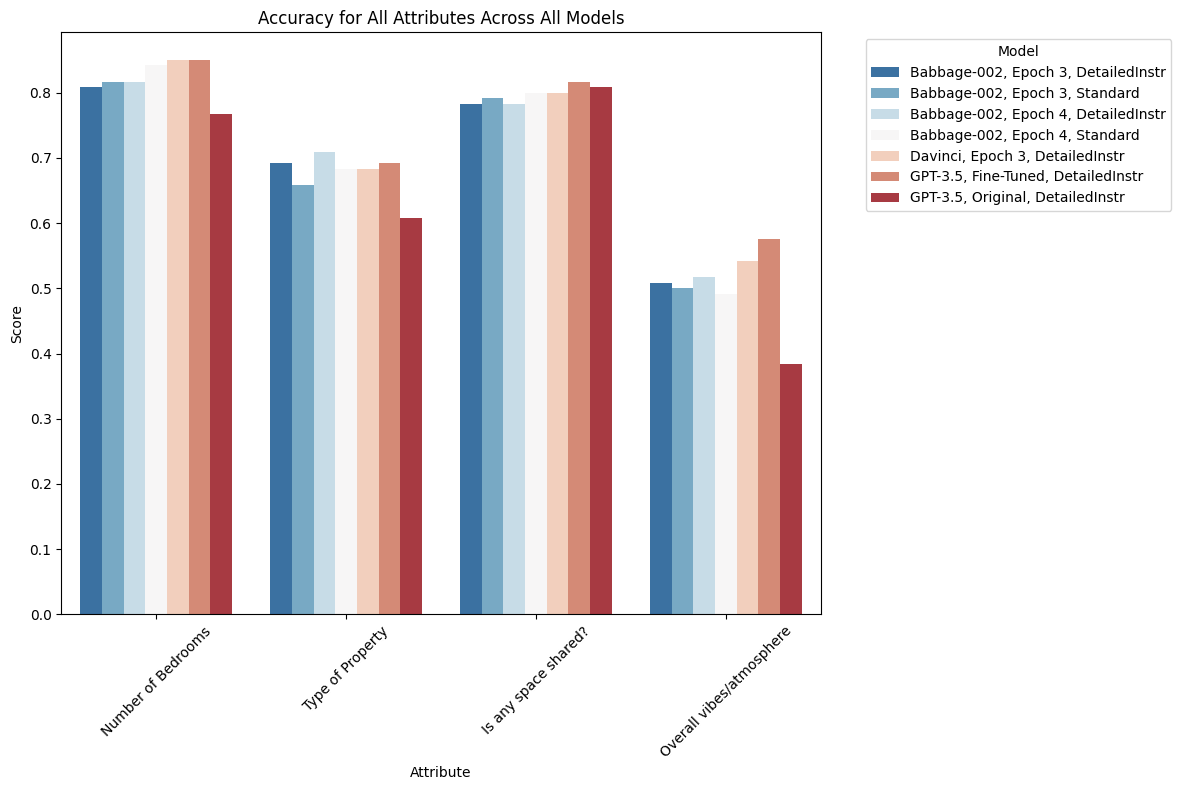

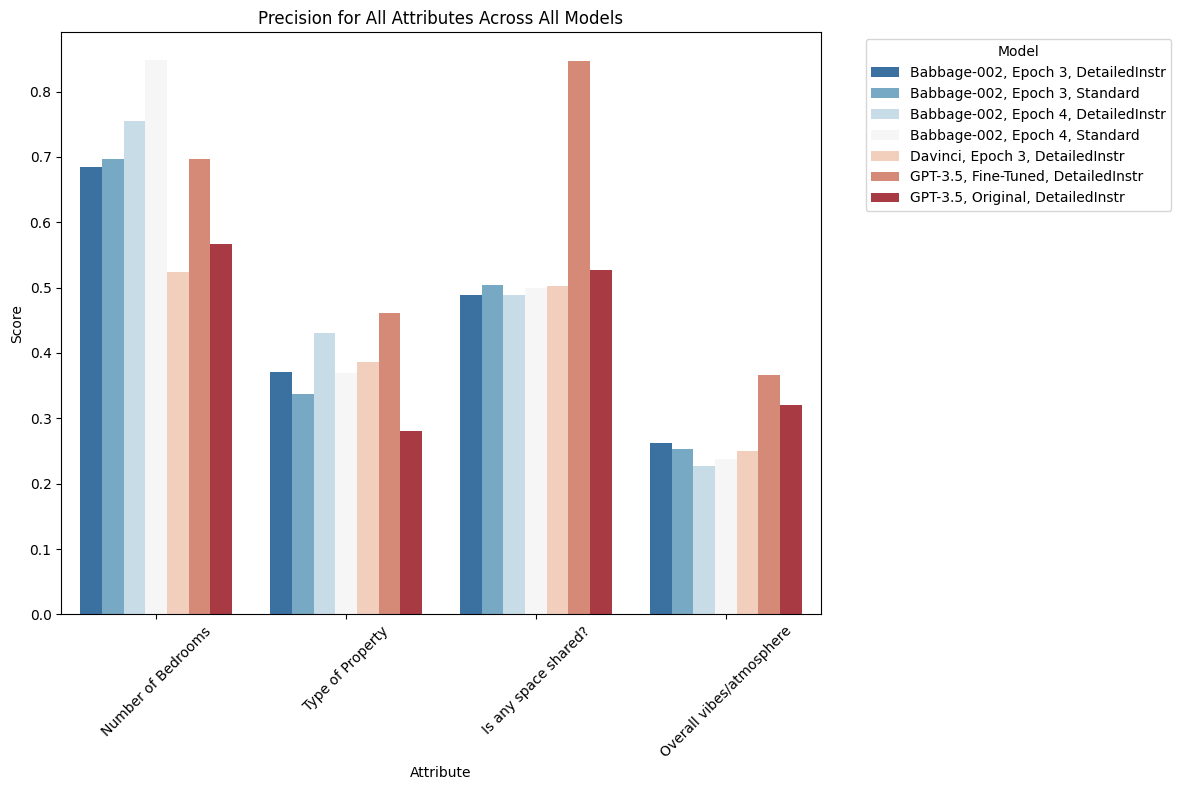

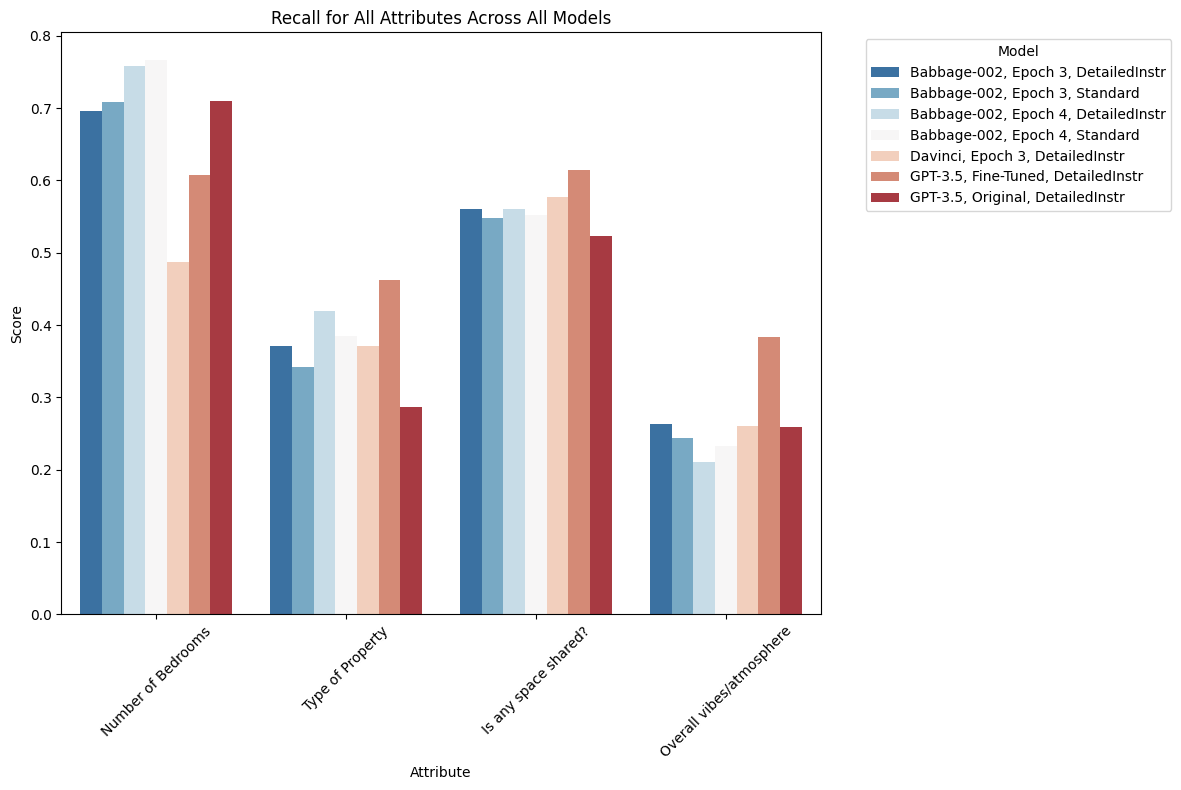

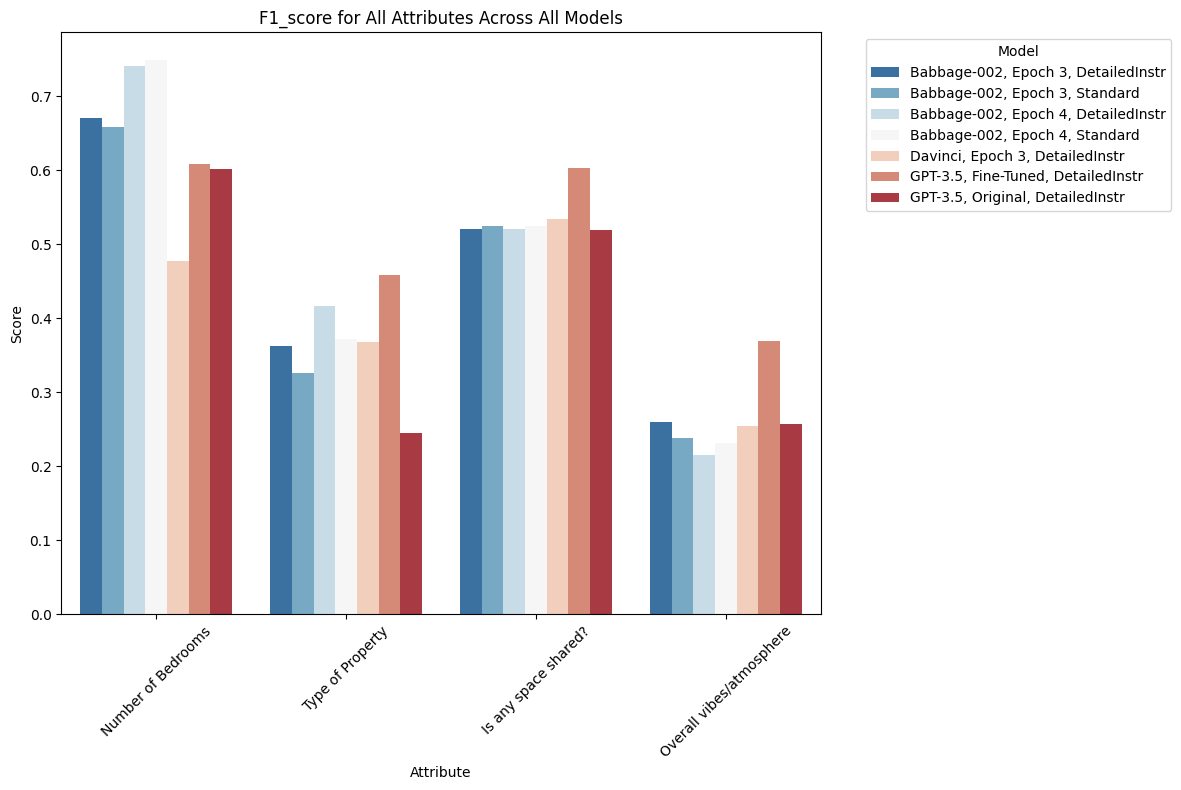

In [85]:
# Call the plotting function
plot_grouped_metrics(metrics_df)

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

# Updated Plotting function with visual distinctions for models, instructions, and epochs
def plot_grouped_metrics(data):
    # Melt the DataFrame to facilitate grouped bar plotting
    data = data.melt(id_vars=['Metrics', 'source_directory'], var_name='Attribute', value_name='Score')
    
    # Convert 'Attribute' to a categorical data type
    data['Attribute'] = pd.Categorical(data['Attribute'], categories=data['Attribute'].unique(), ordered=True)

    metrics = data['Metrics'].unique()
    
    # Define custom color palette based on model groups
    color_palette = {
        'Babbage-002, Epoch 3, DetailedInstr': '#1f77b4',  # dark blue
        'Babbage-002, Epoch 3, Standard': '#aec7e8',  # light blue
        'Babbage-002, Epoch 4, DetailedInstr': '#1f77b4',  # dark blue
        'Babbage-002, Epoch 4, Standard': '#aec7e8',  # light blue
        'Davinci, Epoch 3, DetailedInstr': '#2ca02c',  # green
        'GPT-3.5, Fine-Tuned, DetailedInstr': '#d62728',  # dark red
        'GPT-3.5, Original, DetailedInstr': '#9467bd',  # purple
    }
    
    # Define marker styles for epoch count
    marker_styles = {
        '4': 'D',  # Diamond for 4 epochs
        '3': '',  # Circle for 3 epochs
    }

    model_order = list(rename_map.values())  # Model order from rename_map

    for metric in metrics:
        plt.figure(figsize=(12, 8))
        sns.barplot(
            x='Attribute', 
            y='Score', 
            hue='source_directory', 
            data=data[data['Metrics'] == metric],
            hue_order=model_order,
            palette=[color_palette[model] for model in model_order]
        )
        
        for i, model in enumerate(model_order):
            subset = data[(data['Metrics'] == metric) & (data['source_directory'] == model)]
            epoch = '4' if 'Epoch 4' in model else '3'
            instr_type = 'DetailedInstr' if 'DetailedInstr' in model else 'Standard'
            
            # Determine x positions for markers (slightly shift to avoid overlap)
            x_positions = subset['Attribute'].cat.codes + i * 0.1 - 0.3
            
            plt.scatter(
                x_positions, 
                subset['Score'], 
                marker=marker_styles[epoch], 
                color='black',  # Black marker color
                s=100, 
                label=None if i != 0 else f"{instr_type} (Epoch {epoch})"
            )
        
        plt.title(f'{metric.capitalize()} for All Attributes Across All Models')
        plt.ylabel('Score')
        plt.xlabel('Attribute')
        plt.xticks(rotation=45)
        handles, labels = plt.gca().get_legend_handles_labels()
        
        # Remove duplicate labels in legend
        by_label = dict(zip(labels, handles))
        plt.legend(by_label.values(), by_label.keys(), title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        
        # Save the figure
        # plt.savefig(f"eval_results/aggregate_results/{metric}_metrics_chart.png", dpi=300)  # Save the figure as a PNG file with high resolution
        plt.show()

# Example usage with your data
# plot_grouped_metrics(metrics_df)


/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


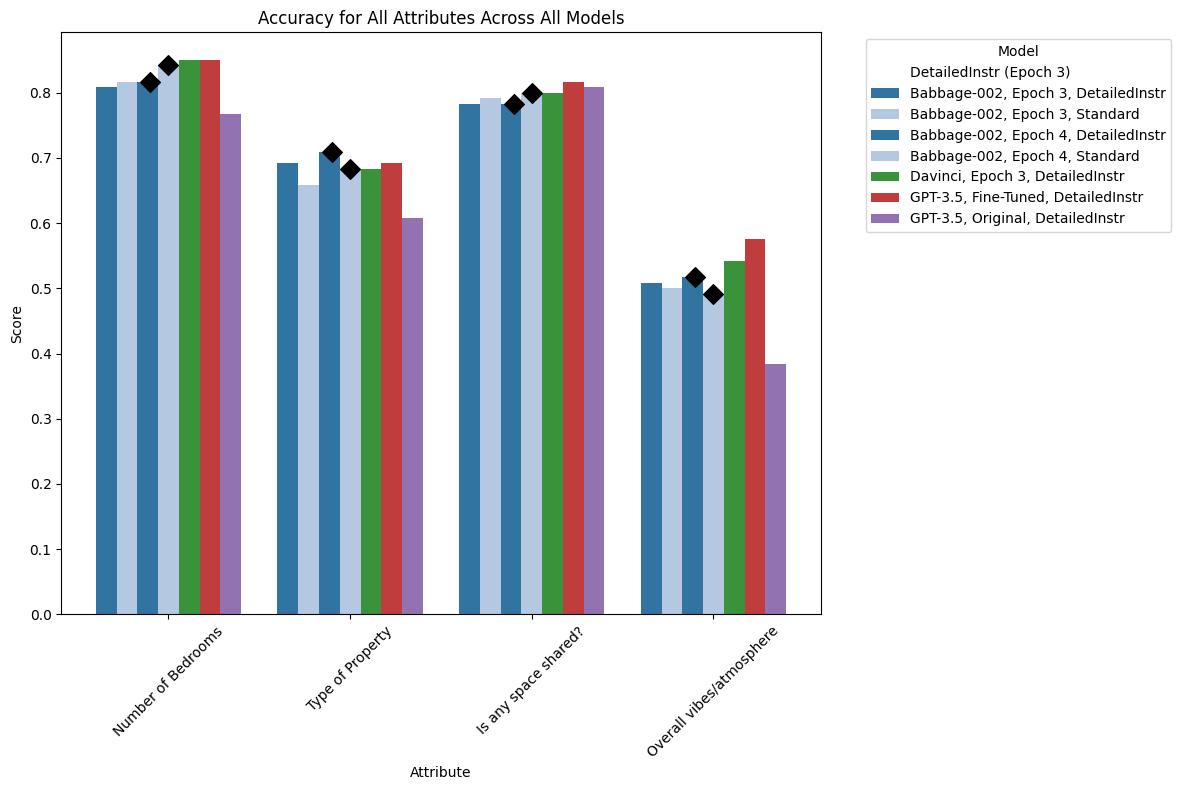

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


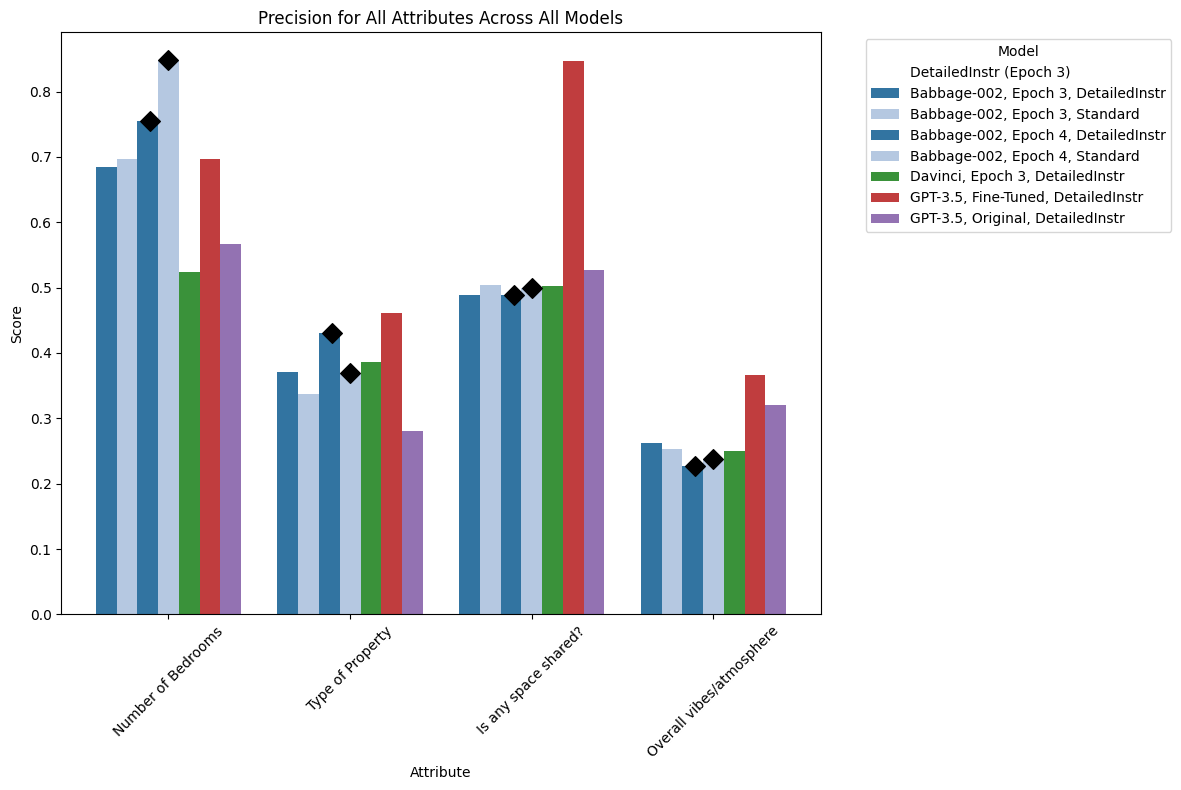

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


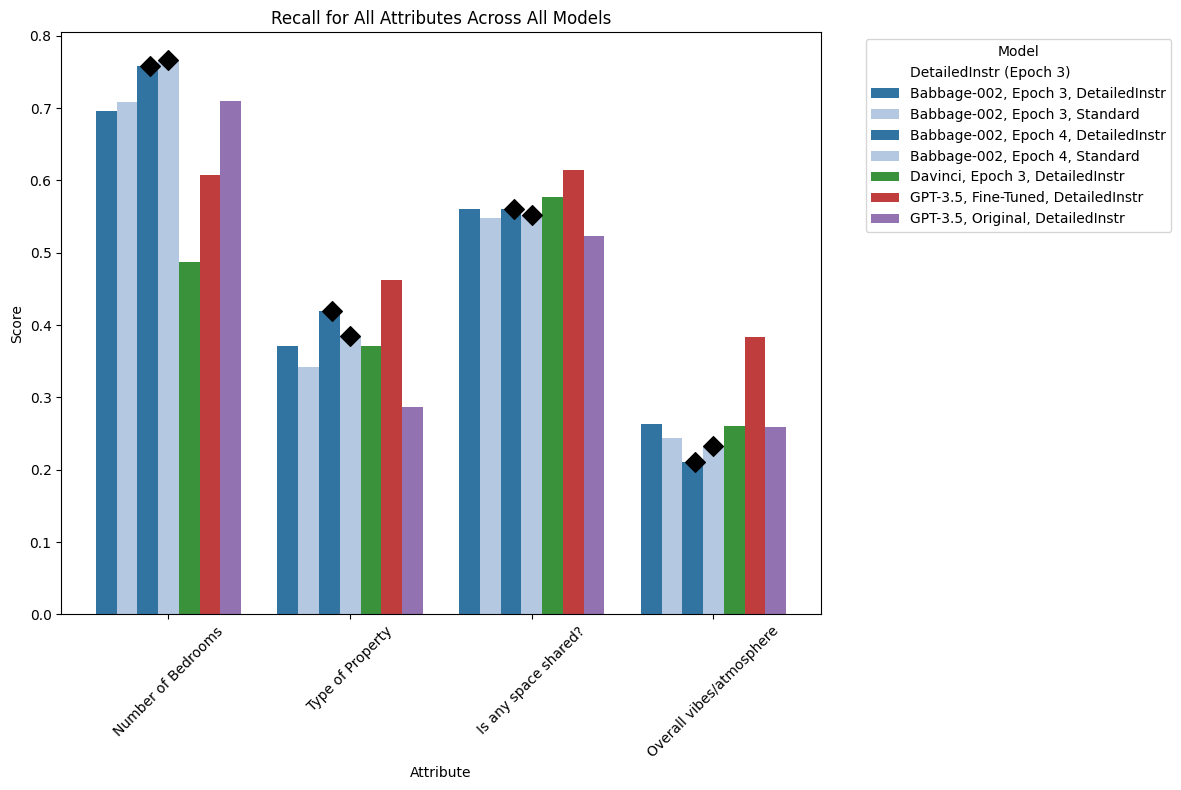

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


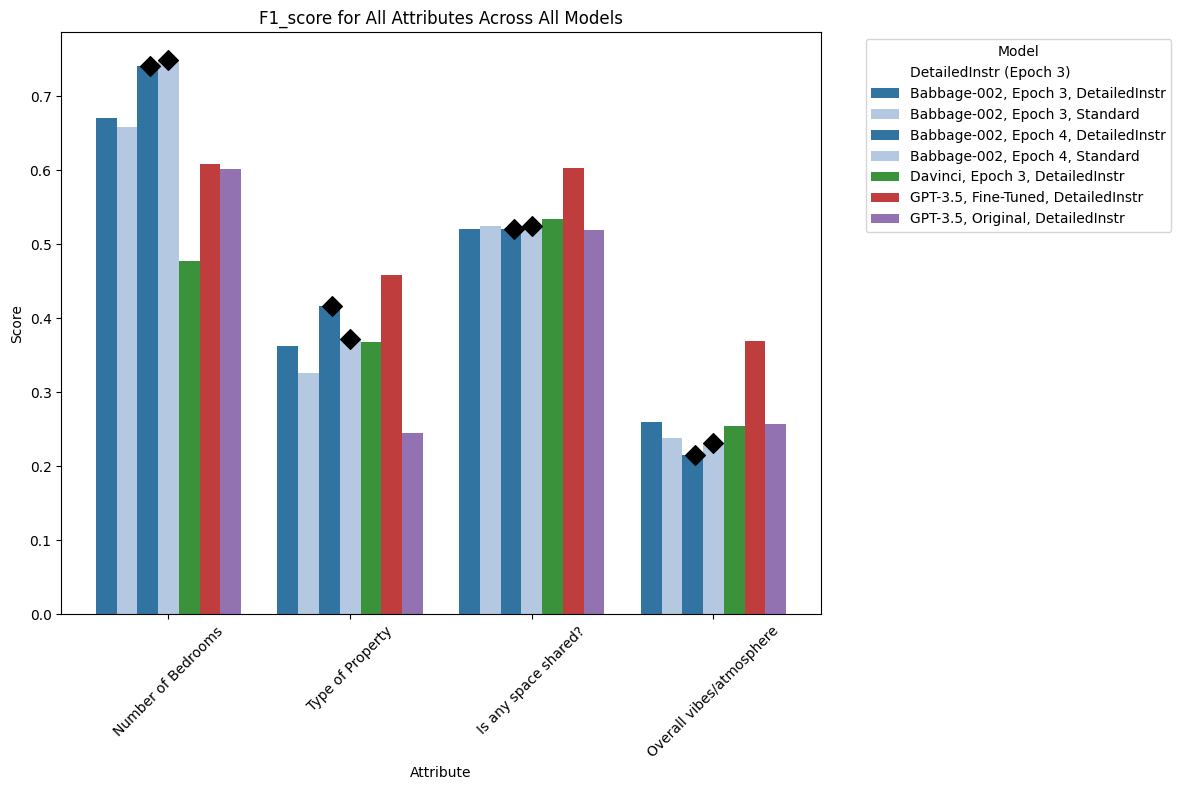

In [124]:
# Call the plotting function
plot_grouped_metrics(metrics_df)

In [69]:
result_dfs['eval_df.csv']

,Unnamed: 0,system,user,assistant,gt_text,index,gen_text,model,json_status,fixed_json,standardized_json,source_directory
0,0,"{'role': 'system', 'content': ""\nConsider the ...","{'role': 'user', 'content': 'Gorgeous 2 bdrm i...","{'role': 'assistant', 'content': '{""Number of ...","{'Number of Bedrooms': '2', 'Type of Property'...",0,"{""Number of Bedrooms"": ""2"", ""Type of Property""...",ft:gpt-3.5-turbo-0125:personal::9tg6PAnc,Perfect,"{'Number of Bedrooms': '2', 'Type of Property'...","{'Number of Bedrooms': '2', 'Type of Property'...",results_3point5_ft_detailedInstr
1,1,"{'role': 'system', 'content': ""\nConsider the ...","{'role': 'user', 'content': 'Wonderful B&B Sty...","{'role': 'assistant', 'content': '{""Number of ...","{'Number of Bedrooms': '1', 'Type of Property'...",1,"{""Number of Bedrooms"": ""1"", ""Type of Property""...",ft:gpt-3.5-turbo-0125:personal::9tg6PAnc,Perfect,"{'Number of Bedrooms': '1', 'Type of Property'...","{'Number of Bedrooms': '1', 'Type of Property'...",results_3point5_ft_detailedInstr
2,2,"{'role': 'system', 'content': ""\nConsider the ...","{'role': 'user', 'content': 'Heavy Sun, Quiet,...","{'role': 'assistant', 'content': '{""Number of ...","{'Number of Bedrooms': '1', 'Type of Property'...",2,"{""Number of Bedrooms"": ""1"", ""Type of Property""...",ft:gpt-3.5-turbo-0125:personal::9tg6PAnc,Perfect,"{'Number of Bedrooms': '1', 'Type of Property'...","{'Number of Bedrooms': '1', 'Type of Property'...",results_3point5_ft_detailedInstr
3,3,"{'role': 'system', 'content': ""\nConsider the ...","{'role': 'user', 'content': ""Brooklyn Amazing ...","{'role': 'assistant', 'content': '{""Number of ...","{'Number of Bedrooms': '2', 'Type of Property'...",3,"{""Number of Bedrooms"": ""2"", ""Type of Property""...",ft:gpt-3.5-turbo-0125:personal::9tg6PAnc,Perfect,"{'Number of Bedrooms': '2', 'Type of Property'...","{'Number of Bedrooms': '2', 'Type of Property'...",results_3point5_ft_detailedInstr
4,4,"{'role': 'system', 'content': ""\nConsider the ...","{'role': 'user', 'content': 'Spacious Greenwic...","{'role': 'assistant', 'content': '{""Number of ...","{'Number of Bedrooms': '1', 'Type of Property'...",4,"{""Number of Bedrooms"": ""1"", ""Type of Property""...",ft:gpt-3.5-turbo-0125:personal::9tg6PAnc,Perfect,"{'Number of Bedrooms': '1', 'Type of Property'...","{'Number of Bedrooms': '1', 'Type of Property'...",results_3point5_ft_detailedInstr
...,...,...,...,...,...,...,...,...,...,...,...,...
115,115,"{'role': 'system', 'content': ""\nConsider the ...","{'role': 'user', 'content': '2 Bedroom Gem - P...","{'role': 'assistant', 'content': '{""Number of ...","{'Number of Bedrooms': '2', 'Type of Property'...",115,"{\n ""Number of Bedrooms"": ""2"",\n ""Type o...",gpt-3.5-turbo-0125,Perfect,"{'Number of Bedrooms': '2', 'Type of Property'...","{'Number of Bedrooms': '2', 'Type of Property'...",results_3point5_og_detailedInstr
116,116,"{'role': 'system', 'content': ""\nConsider the ...","{'role': 'user', 'content': 'Gorgeous Private ...","{'role': 'assistant', 'content': '{""Number of ...","{'Number of Bedrooms': '1', 'Type of Property'...",116,"{\n ""Number of Bedrooms"": ""1"",\n ""Type o...",gpt-3.5-turbo-0125,Perfect,"{'Number of Bedrooms': '1', 'Type of Property'...","{'Number of Bedrooms': '1', 'Type of Property'...",results_3point5_og_detailedInstr
117,117,"{'role': 'system', 'content': ""\nConsider the ...","{'role': 'user', 'content': 'room with very ni...","{'role': 'assistant', 'content': '{""Number of ...","{'Number of Bedrooms': '1', 'Type of Property'...",117,"{\n ""Number of Bedrooms"": ""1"",\n ""Type o...",gpt-3.5-turbo-0125,Perfect,"{'Number of Bedrooms': '1', 'Type of Property'...","{'Number of Bedrooms': '1', 'Type of Property'...",results_3point5_og_detailedInstr
118,118,"{'role': 'system', 'content': ""\nConsider the ...","{'role': 'user', 'content': 'Clean&Serene in S...","{'role': 'assistant', 'content': '{""Number of ...","{'Number of Bedrooms': '1', 'Type of Property'..

In [128]:
path = 'eval_results/aggregate_results/detailed_metrics_concatenated.csv'
df = pd.read_csv(path)

# Assuming df is already loaded
# Set 'Field', 'Metric Type', and 'Label' as index if not already set
if not isinstance(df.index, pd.MultiIndex):
    df.set_index(['Field', 'Metric Type', 'Label'], inplace=True)
    
# Define your custom order
custom_order = [
 'babbage-002_epoch3_result_detailedInstr',
 'babbage-002_epoch3_result',
 'babbage-002_epoch4_result_detailedInstr',
 'babbage-002_epoch4_result',
 'davinci_epoch3_result_detailedInstr',
 'results_3point5_ft_detailedInstr',
 'results_3point5_og_detailedInstr']

df = df[custom_order]

rename_map = {
    'babbage-002_epoch3_result_detailedInstr': "Babbage-002, Epoch 3, DetailedInstr",
    'babbage-002_epoch3_result': "Babbage-002, Epoch 3, Standard",
    'babbage-002_epoch4_result_detailedInstr': "Babbage-002, Epoch 4, DetailedInstr",
    'babbage-002_epoch4_result': "Babbage-002, Epoch 4, Standard",
    'davinci_epoch3_result_detailedInstr': "Davinci, Epoch 3, DetailedInstr",
    'results_3point5_ft_detailedInstr': "GPT-3.5, Fine-Tuned, DetailedInstr",
    'results_3point5_og_detailedInstr': "GPT-3.5, Original, DetailedInstr"
}

df = df.rename(columns=rename_map)



In [130]:
df

Babbage-002, Epoch 3, DetailedInstr  \
Field                    Metric Type Label                                                
Number of Bedrooms       precision   1                                         0.842697   
                                     2                                         0.727273   
                                     not specified                             0.333333   
                                     3                                         0.833333   
                         recall      1                                         0.892857   
                                     2                                         0.800000   
                                     not specified                             0.090909   
                                     3                                         1.000000   
                         f1_score    1                                         0.867052   
                                     2                                         0.761905   
                                     not specified                             0.142857   
                                     3                                         0.909091   
Type of Property         precision   apartment                                 0.754386   
                                     room                                      0.421053   
                                     loft                                      1.000000   
                                     not specified                             0.400000   
                                     studio                                    0.666667   
                         recall      apartment                                 0.860000   
                                     room                                      0.571429   
                                     loft                                      0.833333   
                                     not specified                             0.250000   
                                     studio                                    1.000000   
                         f1_score    apartment                                 0.803738   
                                     room                                      0.484848   
                                     loft                                      0.909091   
                                     not specified                             0.307692   
                                     studio                                    0.800000   
Is any space shared?     precision   false                                     0.857143   
                                     true                                      0.611111   
                                     not specified                             0.000000   
                         recall      false                                     0.867470   
                                     true                                      0.814815   
                                     not specified                             0.000000   
                         f1_score    false                                     0.862275   
                                     true                                      0.698413   
                                     not specified                             0.000000   
Overall vibes/atmosphere precision   comfortable                               0.647059   
                                     artsy                                     0.750000   
                                     modern                                    0.400000   
                                     plain                                     0.153846   
                                     chic                                      0.166667   
                         recall      comfortable                               0.702128   
                                     artsy      

precision
recall
f1_score


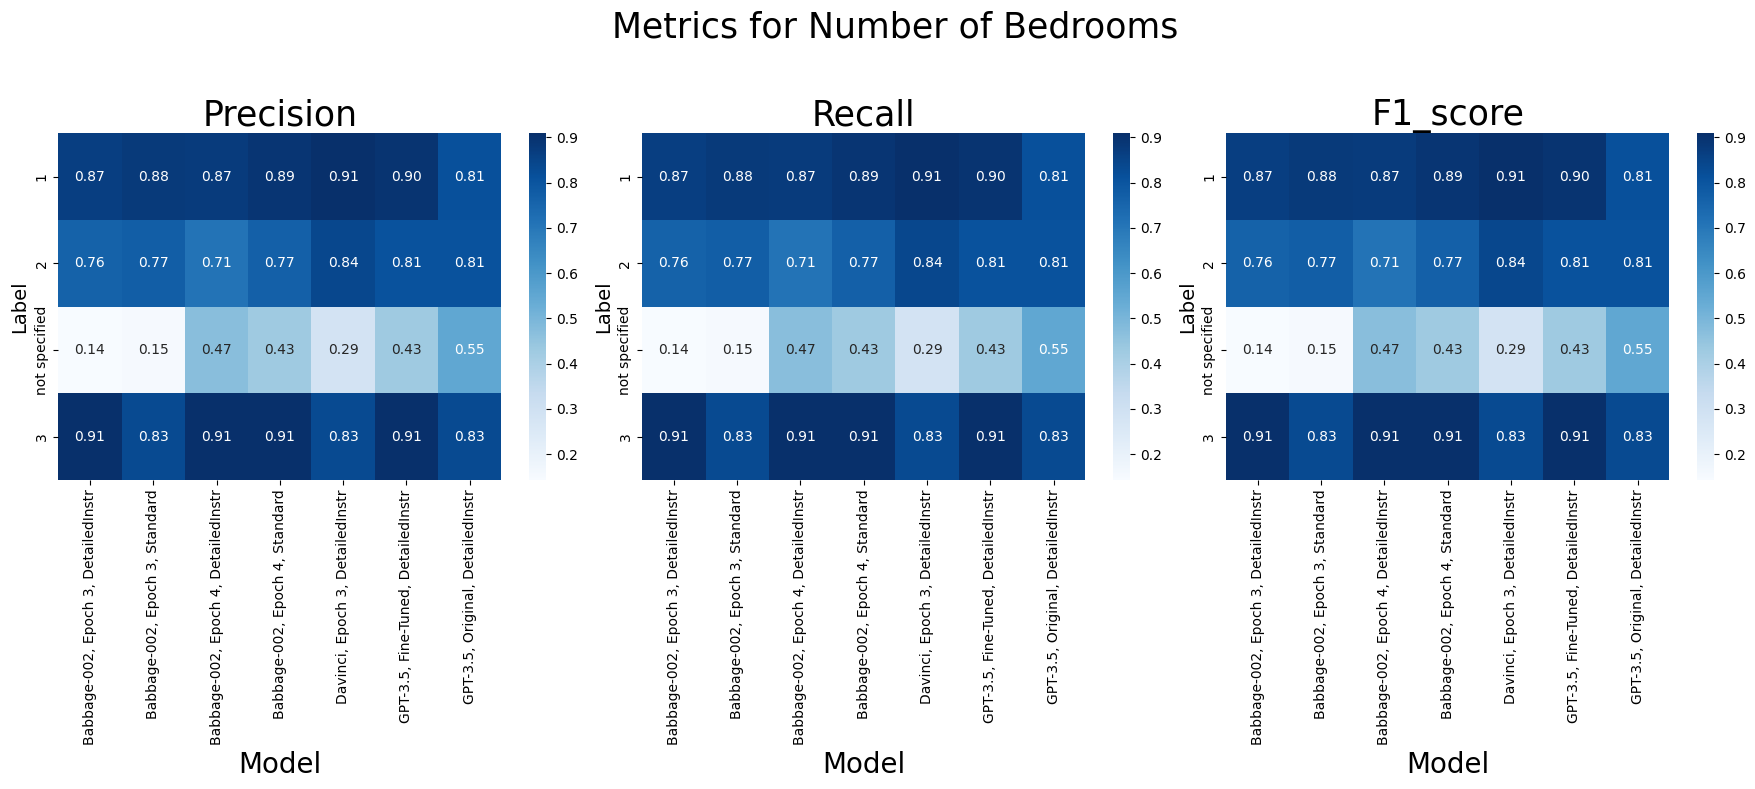

In [139]:
# List of attributes (fields) and metrics
# fields = ['Number of Bedrooms', 'Type of Property', 'Is any space shared?', 'Overall vibes/atmosphere']
fields = ['Number of Bedrooms']
metrics = ['precision', 'recall', 'f1_score']

# Loop through each field and create a main plot with subplots for each metric
for field in fields:
    fig, axes = plt.subplots(1, 3, figsize=(18, 8))  # 1 row, 3 columns for precision, recall, and f1_score
    fig.suptitle(f'Metrics for {field}', fontsize=25)

    for ax, metric in zip(axes, metrics):
        # Filter data for the current field and metric
        data = df.xs((field, metric_type), level=('Field', 'Metric Type'))
        print(metric)
        # Plot heatmap
        sns.heatmap(data, annot=True, cmap='Blues', ax=ax, fmt=".2f")
        ax.set_title(f'{metric.capitalize()}', fontsize=25)
        ax.set_xlabel('Model', fontsize=20)
        ax.set_ylabel('Label', fontsize=14)

        plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout
    plt.savefig(f'eval_results/aggregate_results/metrics_{field.lower().replace("/","").replace(" ","_")}_confusion_matrix.png')
    plt.show()


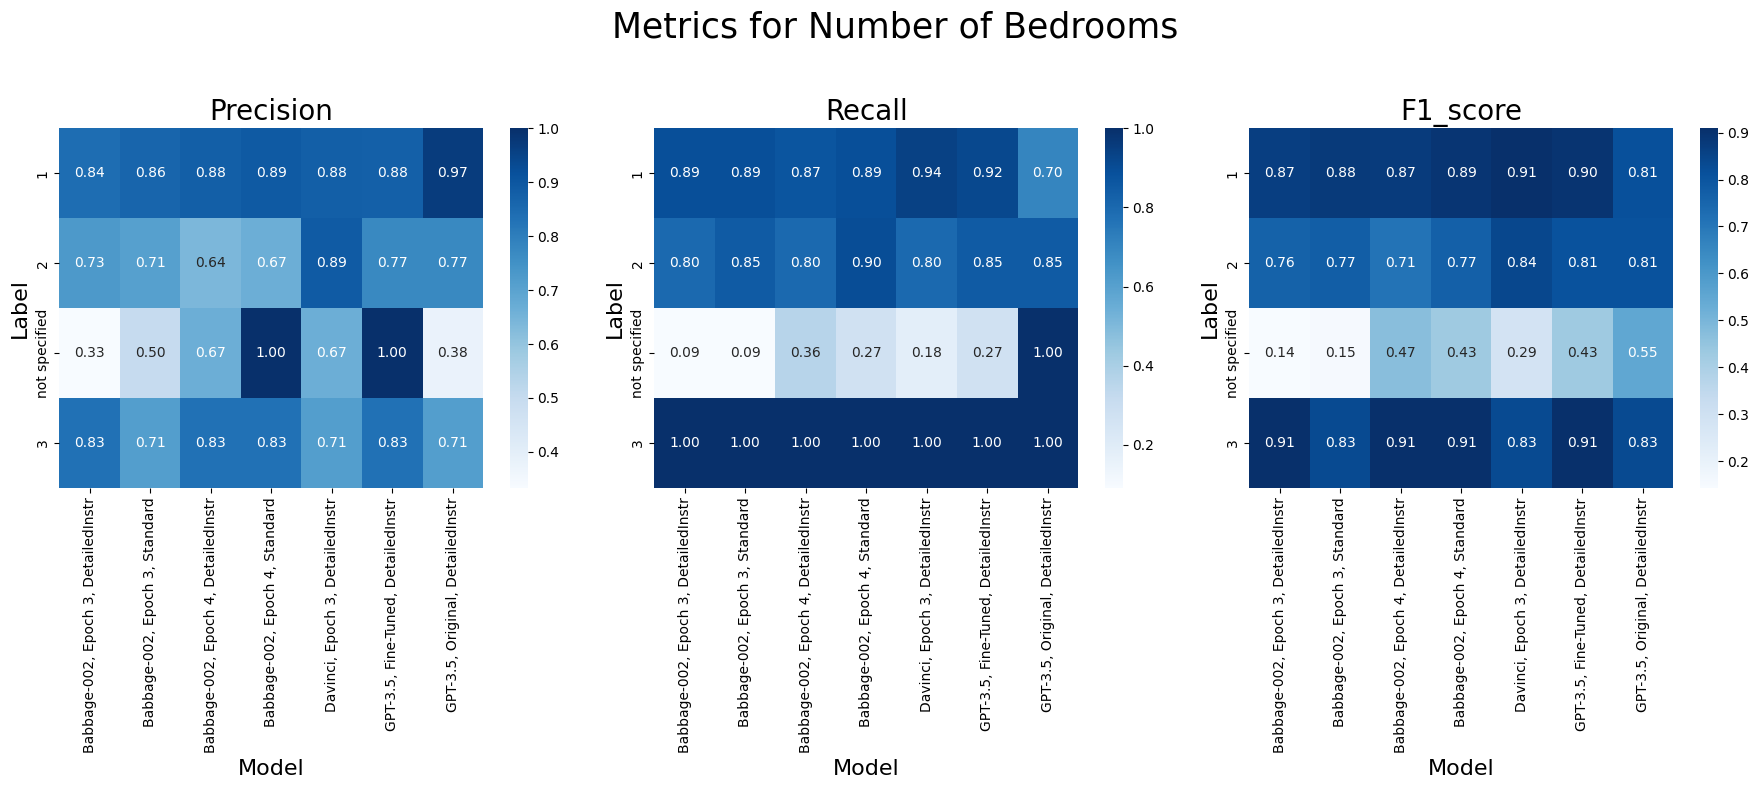

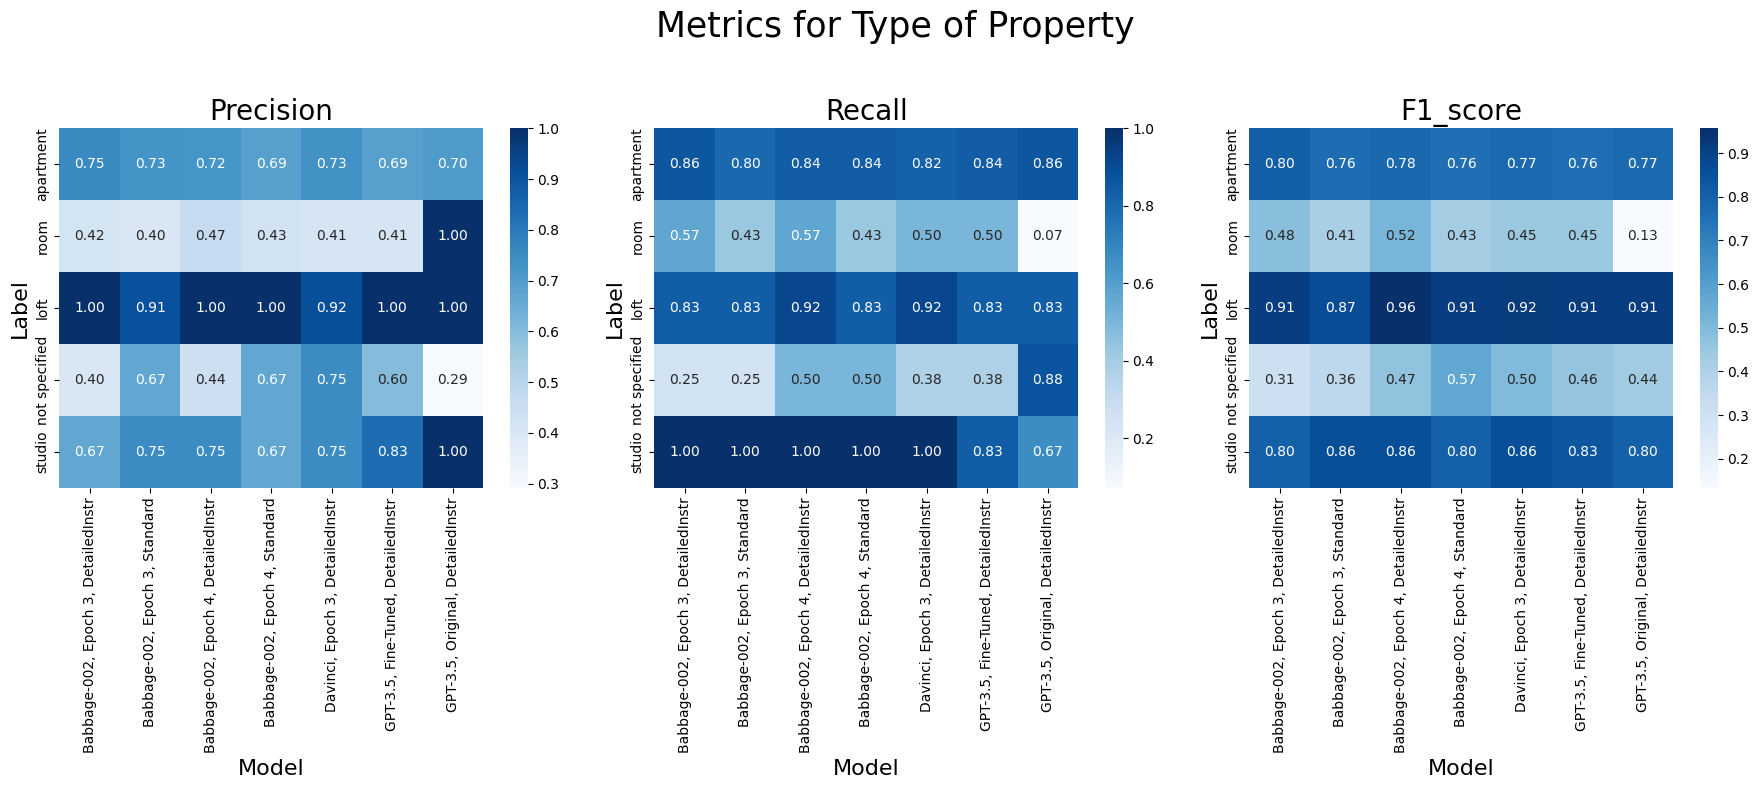

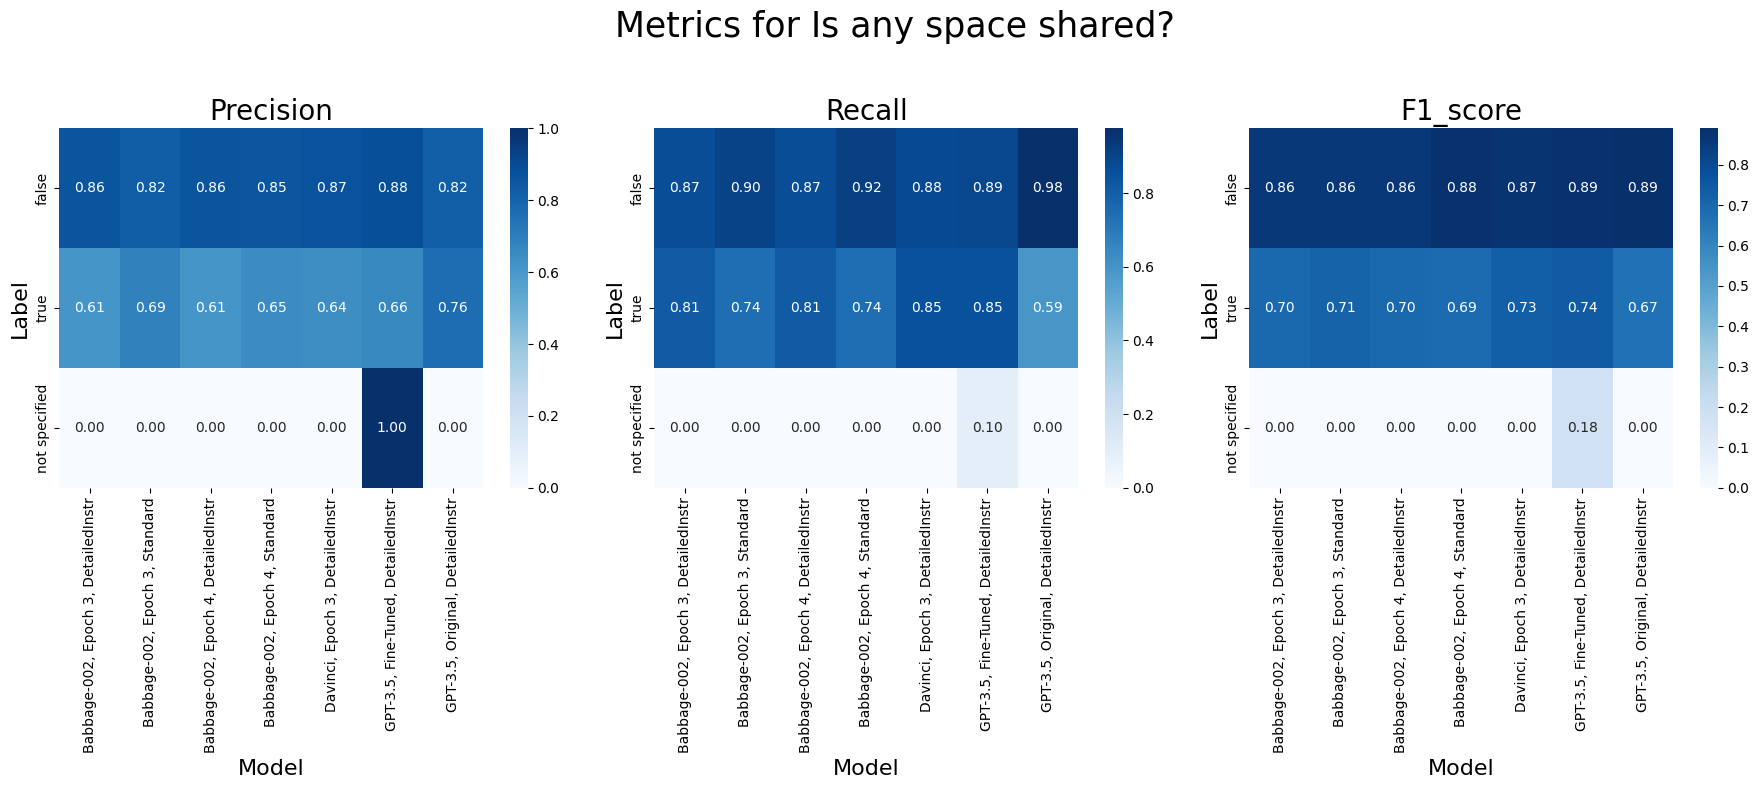

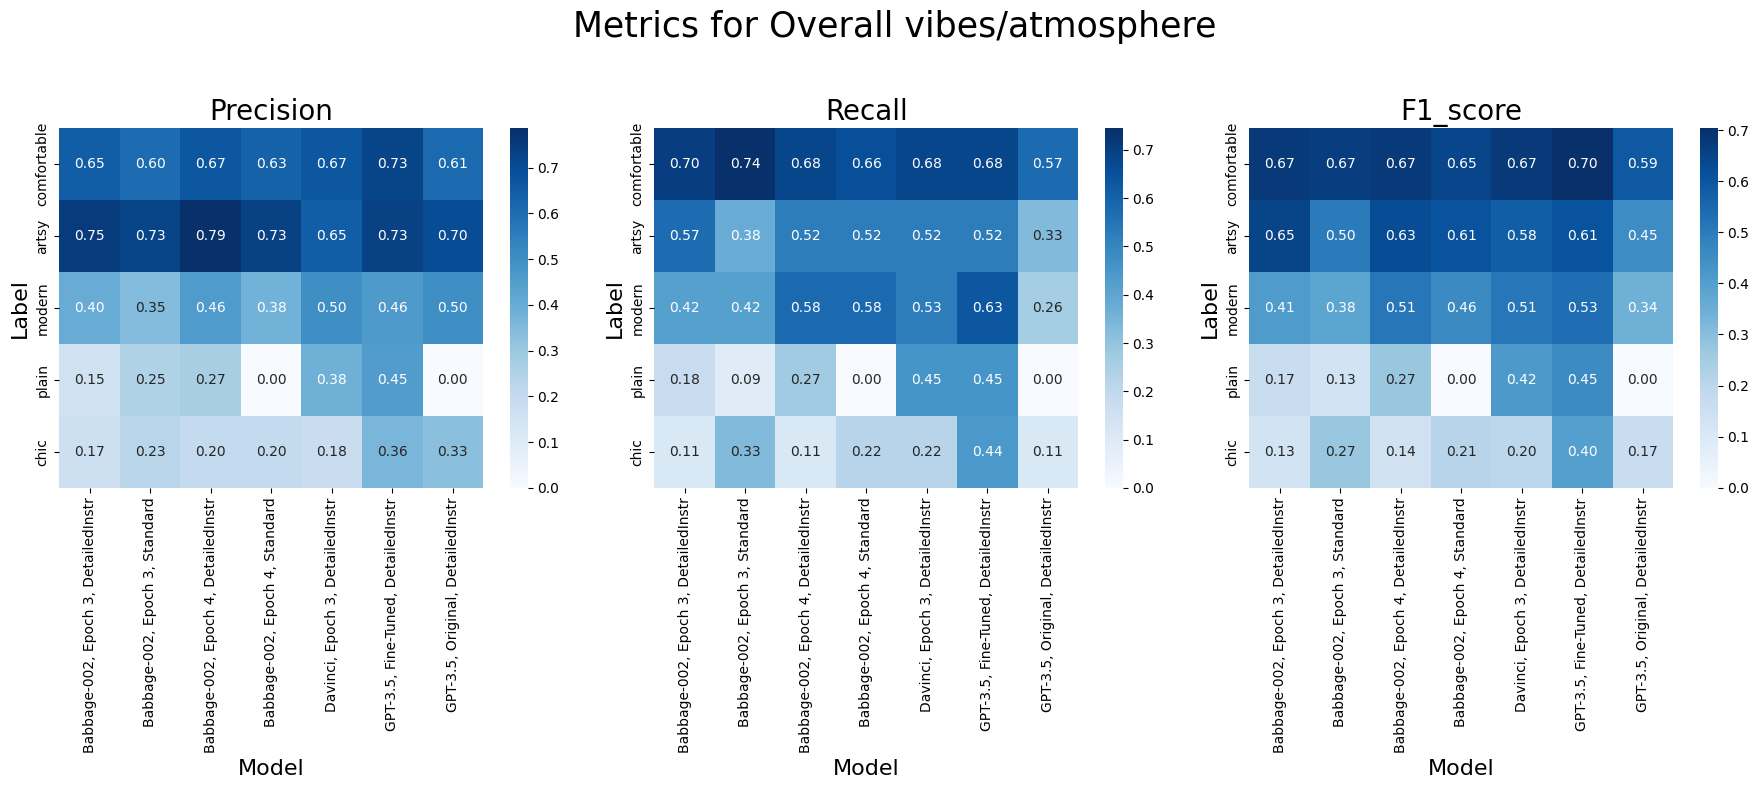

In [140]:
# List of attributes (fields) and metrics
fields = ['Number of Bedrooms', 'Type of Property', 'Is any space shared?', 'Overall vibes/atmosphere']
metrics = ['precision', 'recall', 'f1_score']

# Loop through each field and create a main plot with subplots for each metric
for field in fields:
    fig, axes = plt.subplots(1, 3, figsize=(18, 8))  # 1 row, 3 columns for precision, recall, and f1_score
    fig.suptitle(f'Metrics for {field}', fontsize=25)

    for ax, metric in zip(axes, metrics):
        # Filter data for the current field and metric
        data = df.xs((field, metric), level=('Field', 'Metric Type'))
        
        # Plot heatmap
        sns.heatmap(data, annot=True, cmap='Blues', ax=ax, fmt=".2f")
        ax.set_title(f'{metric.capitalize()}', fontsize=20)
        ax.set_xlabel('Model', fontsize=16)
        ax.set_ylabel('Label', fontsize=16)

    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout
    plt.savefig(f'eval_results/aggregate_results/metrics_{field.lower().replace("/","").replace(" ","_")}_confusion_matrix.png')
    plt.show()


/var/folders/m7/_92t5w1x59v6z4cf2jgfxw1h0000gn/T/ipykernel_24860/2288582055.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("tab10", len(df))


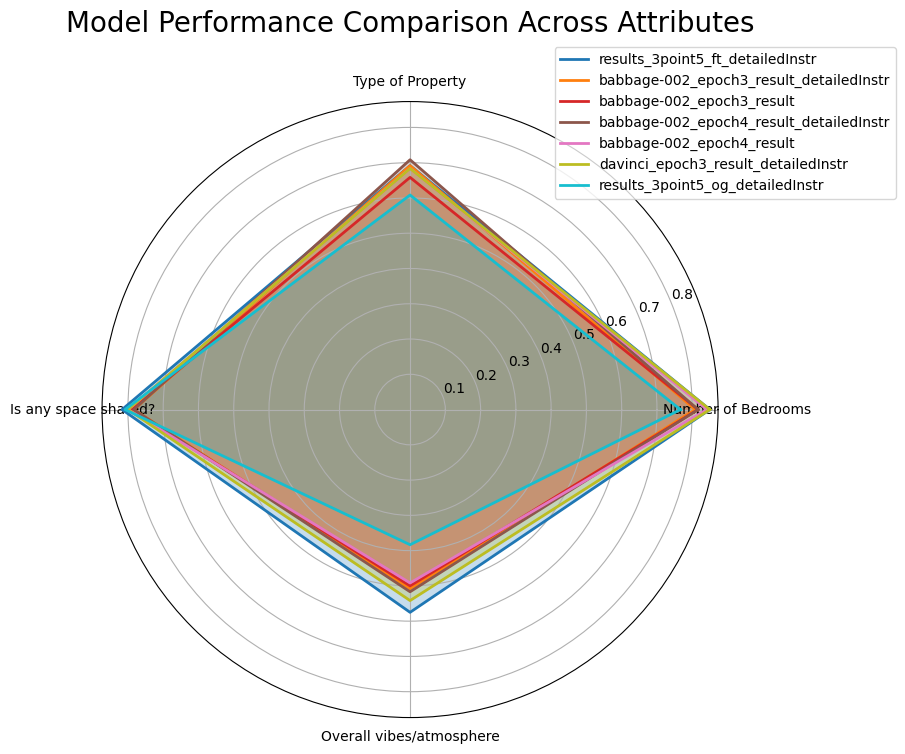

In [126]:
import numpy as np
# Data preparation
data = {
    'Metrics': ['accuracy', 'accuracy', 'accuracy', 'accuracy', 'accuracy', 'accuracy', 'accuracy'],
    'source_directory': [
        'results_3point5_ft_detailedInstr',
        'babbage-002_epoch3_result_detailedInstr',
        'babbage-002_epoch3_result',
        'babbage-002_epoch4_result_detailedInstr',
        'babbage-002_epoch4_result',
        'davinci_epoch3_result_detailedInstr',
        'results_3point5_og_detailedInstr'
    ],
    'Number of Bedrooms': [0.85, 0.8083333333, 0.8166666667, 0.8166666667, 0.8416666667, 0.85, 0.7666666667],
    'Type of Property': [0.6916666667, 0.6916666667, 0.6583333333, 0.7083333333, 0.6833333333, 0.6833333333, 0.6083333333],
    'Is any space shared?': [0.8166666667, 0.7833333333, 0.7916666667, 0.7833333333, 0.8, 0.8, 0.8083333333],
    'Overall vibes/atmosphere': [0.575, 0.5083333333, 0.5, 0.5166666667, 0.4916666667, 0.5416666667, 0.3833333333]
}

df = pd.DataFrame(data)

# Categories for the radar chart
categories = df.columns[2:]
N = len(categories)

# Plotting the radar chart for each model
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(polar=True))

# Color map
colors = plt.cm.get_cmap("tab10", len(df))

for i, row in df.iterrows():
    values = row[2:].tolist()
    values += values[:1]  # Repeat the first value to close the radar chart
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
    angles += angles[:1]
    ax.fill(angles, values, color=colors(i), alpha=0.25)
    ax.plot(angles, values, color=colors(i), linewidth=2, label=row['source_directory'])

# Add labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

# Add a title
plt.title('Model Performance Comparison Across Attributes', size=20, color='black', y=1.1)

# Add a legend
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

# Show the plot
plt.show()

# Save the plot
fig.savefig("radar_chart.png", dpi=300)
